In [ ]:
# link aula
# https://www.youtube.com/watch?v=Agft8OtP238

# Modelo CAPM

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [22]:
# Fetch historical stock data
start_date = '2019-01-01'
end_date = '2020-12-31'

stock_ticker = 'AAPL'

stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
# Calculate daily returns
stock_data[f'{stock_ticker}_returns'] = stock_data['Adj Close'].pct_change()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,AAPL_returns
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994484,148158800,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209961,365248800,-0.099607
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670353,234428400,0.042689
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590965,219111200,-0.002226
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269440,164101200,0.019063


In [23]:
# Fetch market data (e.g., S&P 500 index)
market_ticker = '^GSPC'

market_data = yf.download(market_ticker, start=start_date, end=end_date)
market_data[f'{market_ticker}_returns'] = market_data['Adj Close'].pct_change()
market_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,^GSPC_returns
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,0.009695
...,...,...,...,...,...,...,...
2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000,0.000746
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,0.003537
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,0.008723


In [24]:
# Merge stock and market data
merged_data = pd.concat([stock_data.iloc[:,-1], market_data.iloc[:,-1]], axis=1)
merged_data = merged_data.dropna()
merged_data

,AAPL_returns,^GSPC_returns
Date,,
2019-01-03,-0.099607,-0.024757
2019-01-04,0.042689,0.034336
2019-01-07,-0.002226,0.007010
2019-01-08,0.019063,0.009695
2019-01-09,0.016982,0.004098
...,...,...
2020-12-23,-0.006976,0.000746
2020-12-24,0.007712,0.003537
2020-12-28,0.035765,0.008723


In [29]:
# Get risk-free rate (10-year US Treasury bond yield)
risk_free_rate = yf.Ticker('^TNX').history(period='1d').iloc[-1]['Close'] / 100.0
risk_free_rate

0.03690999984741211

In [30]:
risk_free_rate = 0.05

# Calculate excess returns
merged_data['Excess Returns'] = merged_data[f'{stock_ticker}_returns'] - risk_free_rate

# Calculate the covariance and variance
covariance = np.cov(merged_data['Excess Returns'], merged_data[f'{market_ticker}_returns'])[0][1]
print(f'covariance: {covariance}')
variance = np.var(merged_data[f'{market_ticker}_returns'])
print(f'variance: {variance}')

# Calculate beta
beta = covariance / variance
print(f'beta: {beta}')


covariance: 0.00031343788620015104
variance: 0.00026643685235943357
beta: 1.1764059041551476


In [31]:
# Calculate the expected return using CAPM formula
expected_return = risk_free_rate + beta * (merged_data[f'{market_ticker}_returns'].mean() - risk_free_rate)
expected_return

-0.007734122425216865

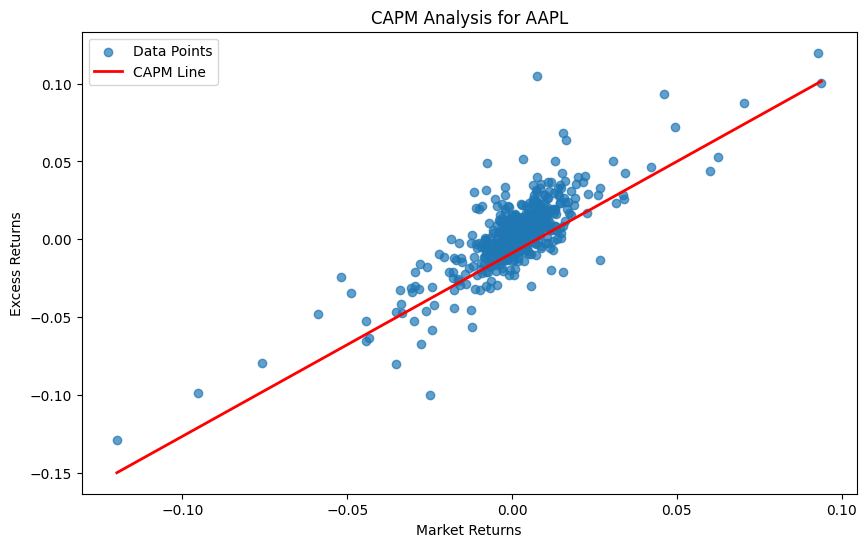

In [38]:
import matplotlib.pyplot as plt

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data[f'{market_ticker}_returns'], merged_data[f'{stock_ticker}_returns'], alpha=0.7, label='Data Points')

# Add the CAPM line
x = np.linspace(merged_data[f'{market_ticker}_returns'].min(), merged_data[f'{market_ticker}_returns'].max(), 100)
y = beta * (x - merged_data[f'{market_ticker}_returns'].mean()) + expected_return
plt.plot(x, y, color='red', linewidth=2, label='CAPM Line')

# Set plot title and labels
plt.title('CAPM Analysis for {}'.format(stock_ticker))
plt.xlabel('Market Returns')
plt.ylabel('Excess Returns')

# Add legend
plt.legend()

# Show the plot
plt.show()